In [29]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [38]:
##Open Dataset
df = pd.read_csv('CSV Files with Calculated Indicators/NYSE.csv')

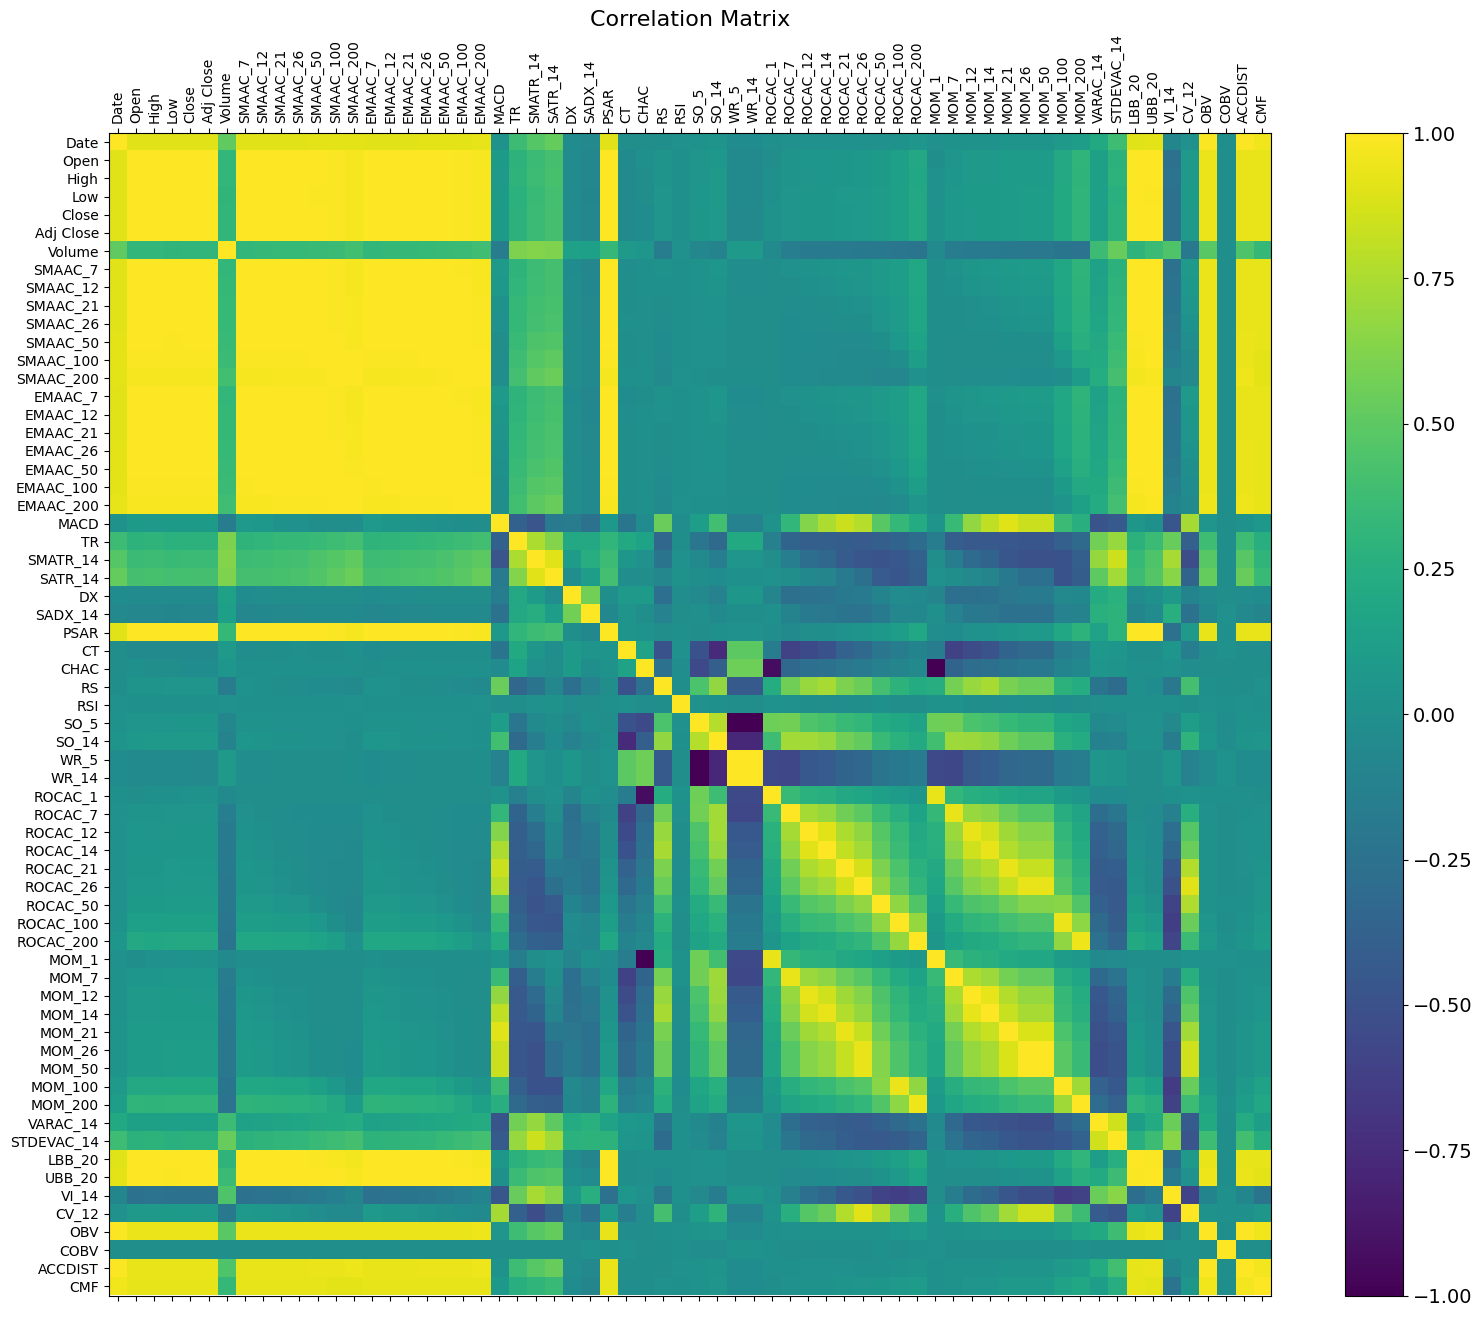

In [35]:
#Plot correlations
f = plt.figure(figsize=(19, 15))
corr = df.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [43]:
##Plotting Time Series Data

In [32]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
print(df.head())

         0         1         2         3         4         5         6   \
0  0.000000  0.128013  0.120804  0.131645  0.128013  0.128013  0.110185   
1  0.000123  0.126765  0.119555  0.130394  0.126765  0.126765  0.111844   
2  0.000247  0.131502  0.124294  0.135139  0.131502  0.131502  0.114319   
3  0.000370  0.134417  0.127210  0.138060  0.134417  0.134417  0.103796   
4  0.000741  0.125775  0.118564  0.129402  0.125775  0.125775  0.091650   

         7         8         9   ...        54        55        56        57  \
0  0.120745  0.111874  0.096401  ...  0.001456  0.024909  0.122759  0.097919   
1  0.120191  0.112421  0.097649  ...  0.001421  0.024471  0.127726  0.095604   
2  0.119921  0.113410  0.099189  ...  0.001468  0.025051  0.131511  0.094321   
3  0.120933  0.113874  0.100564  ...  0.001294  0.022890  0.132787  0.094904   
4  0.121356  0.113187  0.101046  ...  0.000800  0.016037  0.134954  0.093862   

         58        59        60        61   62   63  
0  0.113833  0

In [40]:
normalized_df=(df-df.mean())/df.std()
normalized_df=(df-df.min())/(df.max()-df.min())
print(normalized_df)

          Date      Open      High       Low     Close  Adj Close    Volume  \
0     0.000000  0.128013  0.120804  0.131645  0.128013   0.128013  0.110185   
1     0.000123  0.126765  0.119555  0.130394  0.126765   0.126765  0.111844   
2     0.000247  0.131502  0.124294  0.135139  0.131502   0.131502  0.114319   
3     0.000370  0.134417  0.127210  0.138060  0.134417   0.134417  0.103796   
4     0.000741  0.125775  0.118564  0.129402  0.125775   0.125775  0.091650   
...        ...       ...       ...       ...       ...        ...       ...   
5566  0.999136  0.952097  0.953090  0.956590  0.955566   0.955566  0.261967   
5567  0.999630  0.955566  0.958562  0.960691  0.962348   0.962348  0.215203   
5568  0.999753  0.962348  0.959767  0.966360  0.965308   0.965308  0.235786   
5569  0.999877  0.965308  0.961213  0.969106  0.964717   0.964717  0.231434   
5570  1.000000  0.964717  0.959323  0.963956  0.961846   0.961846  0.268926   

       SMAAC_7  SMAAC_12  SMAAC_21  ...  VARAC_14  